In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = './names/'


Задача №1.
Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

Вероятно, по ошибке у имени Robert есть как M, так и F (женский пол). Roberta в списках присутствует.


In [3]:
ruth = []
robert_f = []
robert_m = []
for year in range(1900, 2001):
    names_all = pd.read_csv(
        f"{DATA_PATH}yob{str(year)}.txt",
        names=['Name', 'Gender', 'Count']
    )
    data_ruth = names_all[names_all.Name=='Ruth']
    data_robert_f = names_all[(names_all.Name=='Robert') & (names_all.Gender=='F')]
    data_robert_m = names_all[(names_all.Name=='Robert') & (names_all.Gender=='M')]
    ruth.append(data_ruth.values[0][2])
    robert_f.append(data_robert_f.values[0][2])
    robert_m.append(data_robert_m.values[0][2])
    
quantity_by_year = pd.DataFrame({
    'Ruth': ruth,
    'Robert(F)': robert_f,
    'Robert(M)': robert_m
}, index=range(1900, 2001))

In [4]:
quantity_by_year.tail(10)

,Robert(F),Robert(M),Ruth
1991,77,26828,985
1992,59,24088,853
1993,70,22444,857
1994,52,20554,879
1995,44,18580,850
1996,37,17672,801
1997,36,16303,856
1998,28,15524,850
1999,24,14539,867
2000,23,13735,902


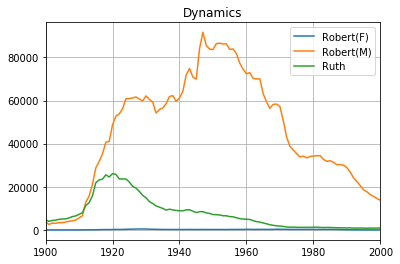

In [5]:
quantity_by_year.plot(title='Dynamics', grid=True)


Задача №2.
Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).


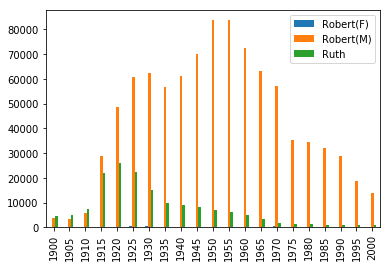

In [6]:
quantity_by_year[quantity_by_year.index % 5 == 0].plot.bar()


Задача №3.
Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.


In [7]:
names_all = pd.read_csv(
        f"{DATA_PATH}yob1950.txt",
        names=['Name', 'Gender', 'Count']
    )

r_names = names_all[names_all.Name.str.startswith('R')]
top10 = r_names.sort_values(by='Count', ascending=False).head(10)
top10

,Name,Gender,Count
6114,Robert,M,83575
6119,Richard,M,51014
6124,Ronald,M,29917
6139,Roger,M,12551
6143,Raymond,M,11180
35,Rebecca,F,9426
48,Ruth,F,7128
6163,Roy,M,6459
55,Rita,F,6425
6164,Ralph,M,6406


In [8]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return val
    return my_autopct

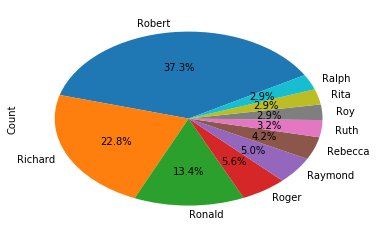

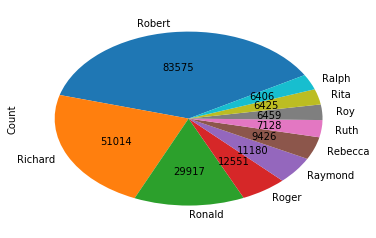

In [9]:
top10.plot.pie(y='Count', labels=top10['Name'], legend=False, startangle=30, autopct='%1.1f%%')
top10.plot.pie(y='Count', labels=top10['Name'], legend=False, startangle=30, autopct=make_autopct(top10.Count))


Задача №4.
Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".


In [10]:
def count_cons(name):
    count = 0
    for letter in name:
        if letter in 'aeyuioAEYUIO':
            continue
        else:
            count += 1
    return count

In [11]:
consonant_dict = {}
for year in range(1900, 2001):
    names_all = pd.read_csv(
        f"{DATA_PATH}yob{str(year)}.txt",
        names=['Name', 'Gender', 'Count']
    )

    for row in names_all.itertuples():
        name = getattr(row, "Name")
        count = getattr(row, "Count")
        if name in consonant_dict:
            consonant_dict[name] += count
        else:
            consonant_dict[name] = count

consonant_df = pd.DataFrame(list(consonant_dict.items()), columns=['Name', 'Count'])
consonant_df['Consonant'] = list(map(lambda x: count_cons(consonant_df.iloc[x]['Name']), 
                                     range(consonant_df.shape[0])))
print(consonant_df.tail(10))
consonant_df.head(10)

           Name  Count  Consonant
70533    Zaccai      5          3
70534  Zackorie      5          4
70535    Zaiden      5          3
70536    Zamier      5          3
70537     Zamon      5          3
70538    Zanden      5          4
70539   Zayveon      5          3
70540    Zefram      5          4
70541     Zemar      5          3
70542     Zeven      5          3


,Name,Count,Consonant
0,Mary,3853689,2
1,Helen,957902,3
2,Anna,674604,2
3,Margaret,1154183,5
4,Ruth,771631,3
5,Elizabeth,1379931,5
6,Florence,285497,5
7,Ethel,233339,3
8,Marie,494470,2
9,Lillian,304136,4


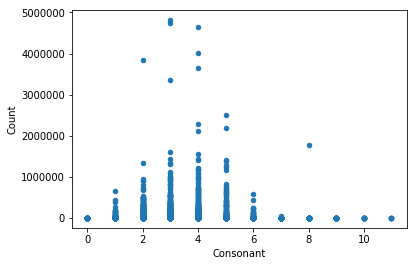

In [12]:
consonant_df.plot.scatter(x='Consonant', y='Count')